In [ ]:
import pandas as pd

# Load the dataset
file_path = "data.xlsx"
df = pd.read_excel(file_path)

# Clean column names (remove spaces if any)
df.columns = df.columns.str.replace(" ", "_")

# Drop columns 'Drug' and 'Disease'
df = df.drop(columns=['Drug_', 'Disease'], errors='ignore')

# Display the first few rows of the cleaned dataset
df.head()


,MW,R,M1,ReZG3,N,IN1,IN2,GQ,QG
0,335.50,142,122,730,55.06,23.08,26.48,23.36,27.08
1,383.30,171,142,922,62.83,26.72,29.89,25.59,31.12
2,390.22,103,92,510,42.70,19.82,20.53,18.57,21.75
3,214.05,48,46,222,22.90,11.38,10.82,14.52,9.92
4,382.50,172,146,880,65.98,28.33,32.03,28.51,31.34


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from matplotlib_venn import venn3

# Compute correlation matrix
correlation_matrix = df.corr()
# Display correlation matrix
print(correlation_matrix)

             MW         R        M1     ReZG3         N       IN1       IN2  \
MW     1.000000  0.883066  0.890342  0.893464  0.891421  0.898894  0.885015   
R      0.883066  1.000000  0.999211  0.994872  0.997796  0.993596  0.997246   
M1     0.890342  0.999211  1.000000  0.995891  0.999354  0.996387  0.998502   
ReZG3  0.893464  0.994872  0.995891  1.000000  0.994822  0.991774  0.992881   
N      0.891421  0.997796  0.999354  0.994822  1.000000  0.997935  0.998789   
IN1    0.898894  0.993596  0.996387  0.991774  0.997935  1.000000  0.997875   
IN2    0.885015  0.997246  0.998502  0.992881  0.998789  0.997875  1.000000   
GQ     0.900684  0.962364  0.970223  0.966115  0.972301  0.975189  0.968212   
QG     0.885895  0.994934  0.996775  0.993840  0.995453  0.992287  0.994371   

             GQ        QG  
MW     0.900684  0.885895  
R      0.962364  0.994934  
M1     0.970223  0.996775  
ReZG3  0.966115  0.993840  
N      0.972301  0.995453  
IN1    0.975189  0.992287  
IN2    0.9682

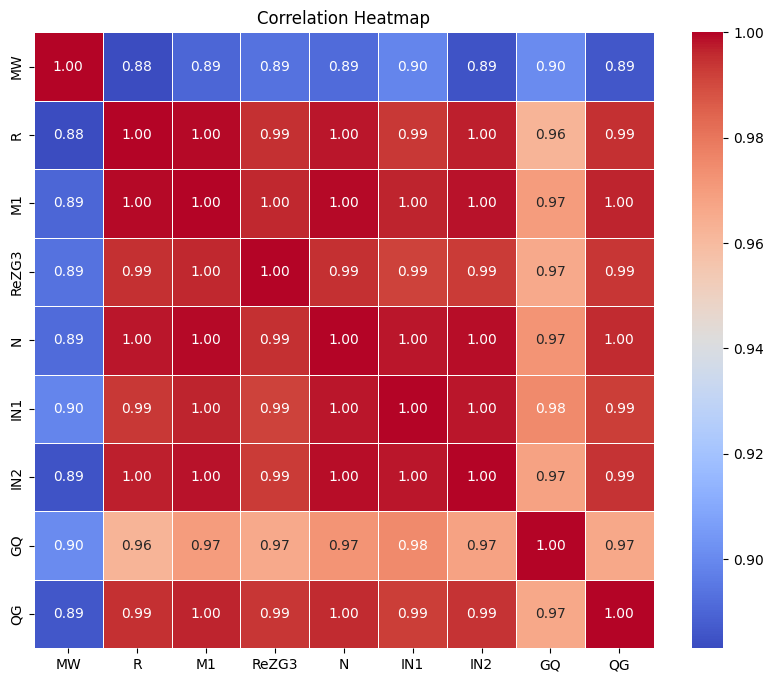

In [ ]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

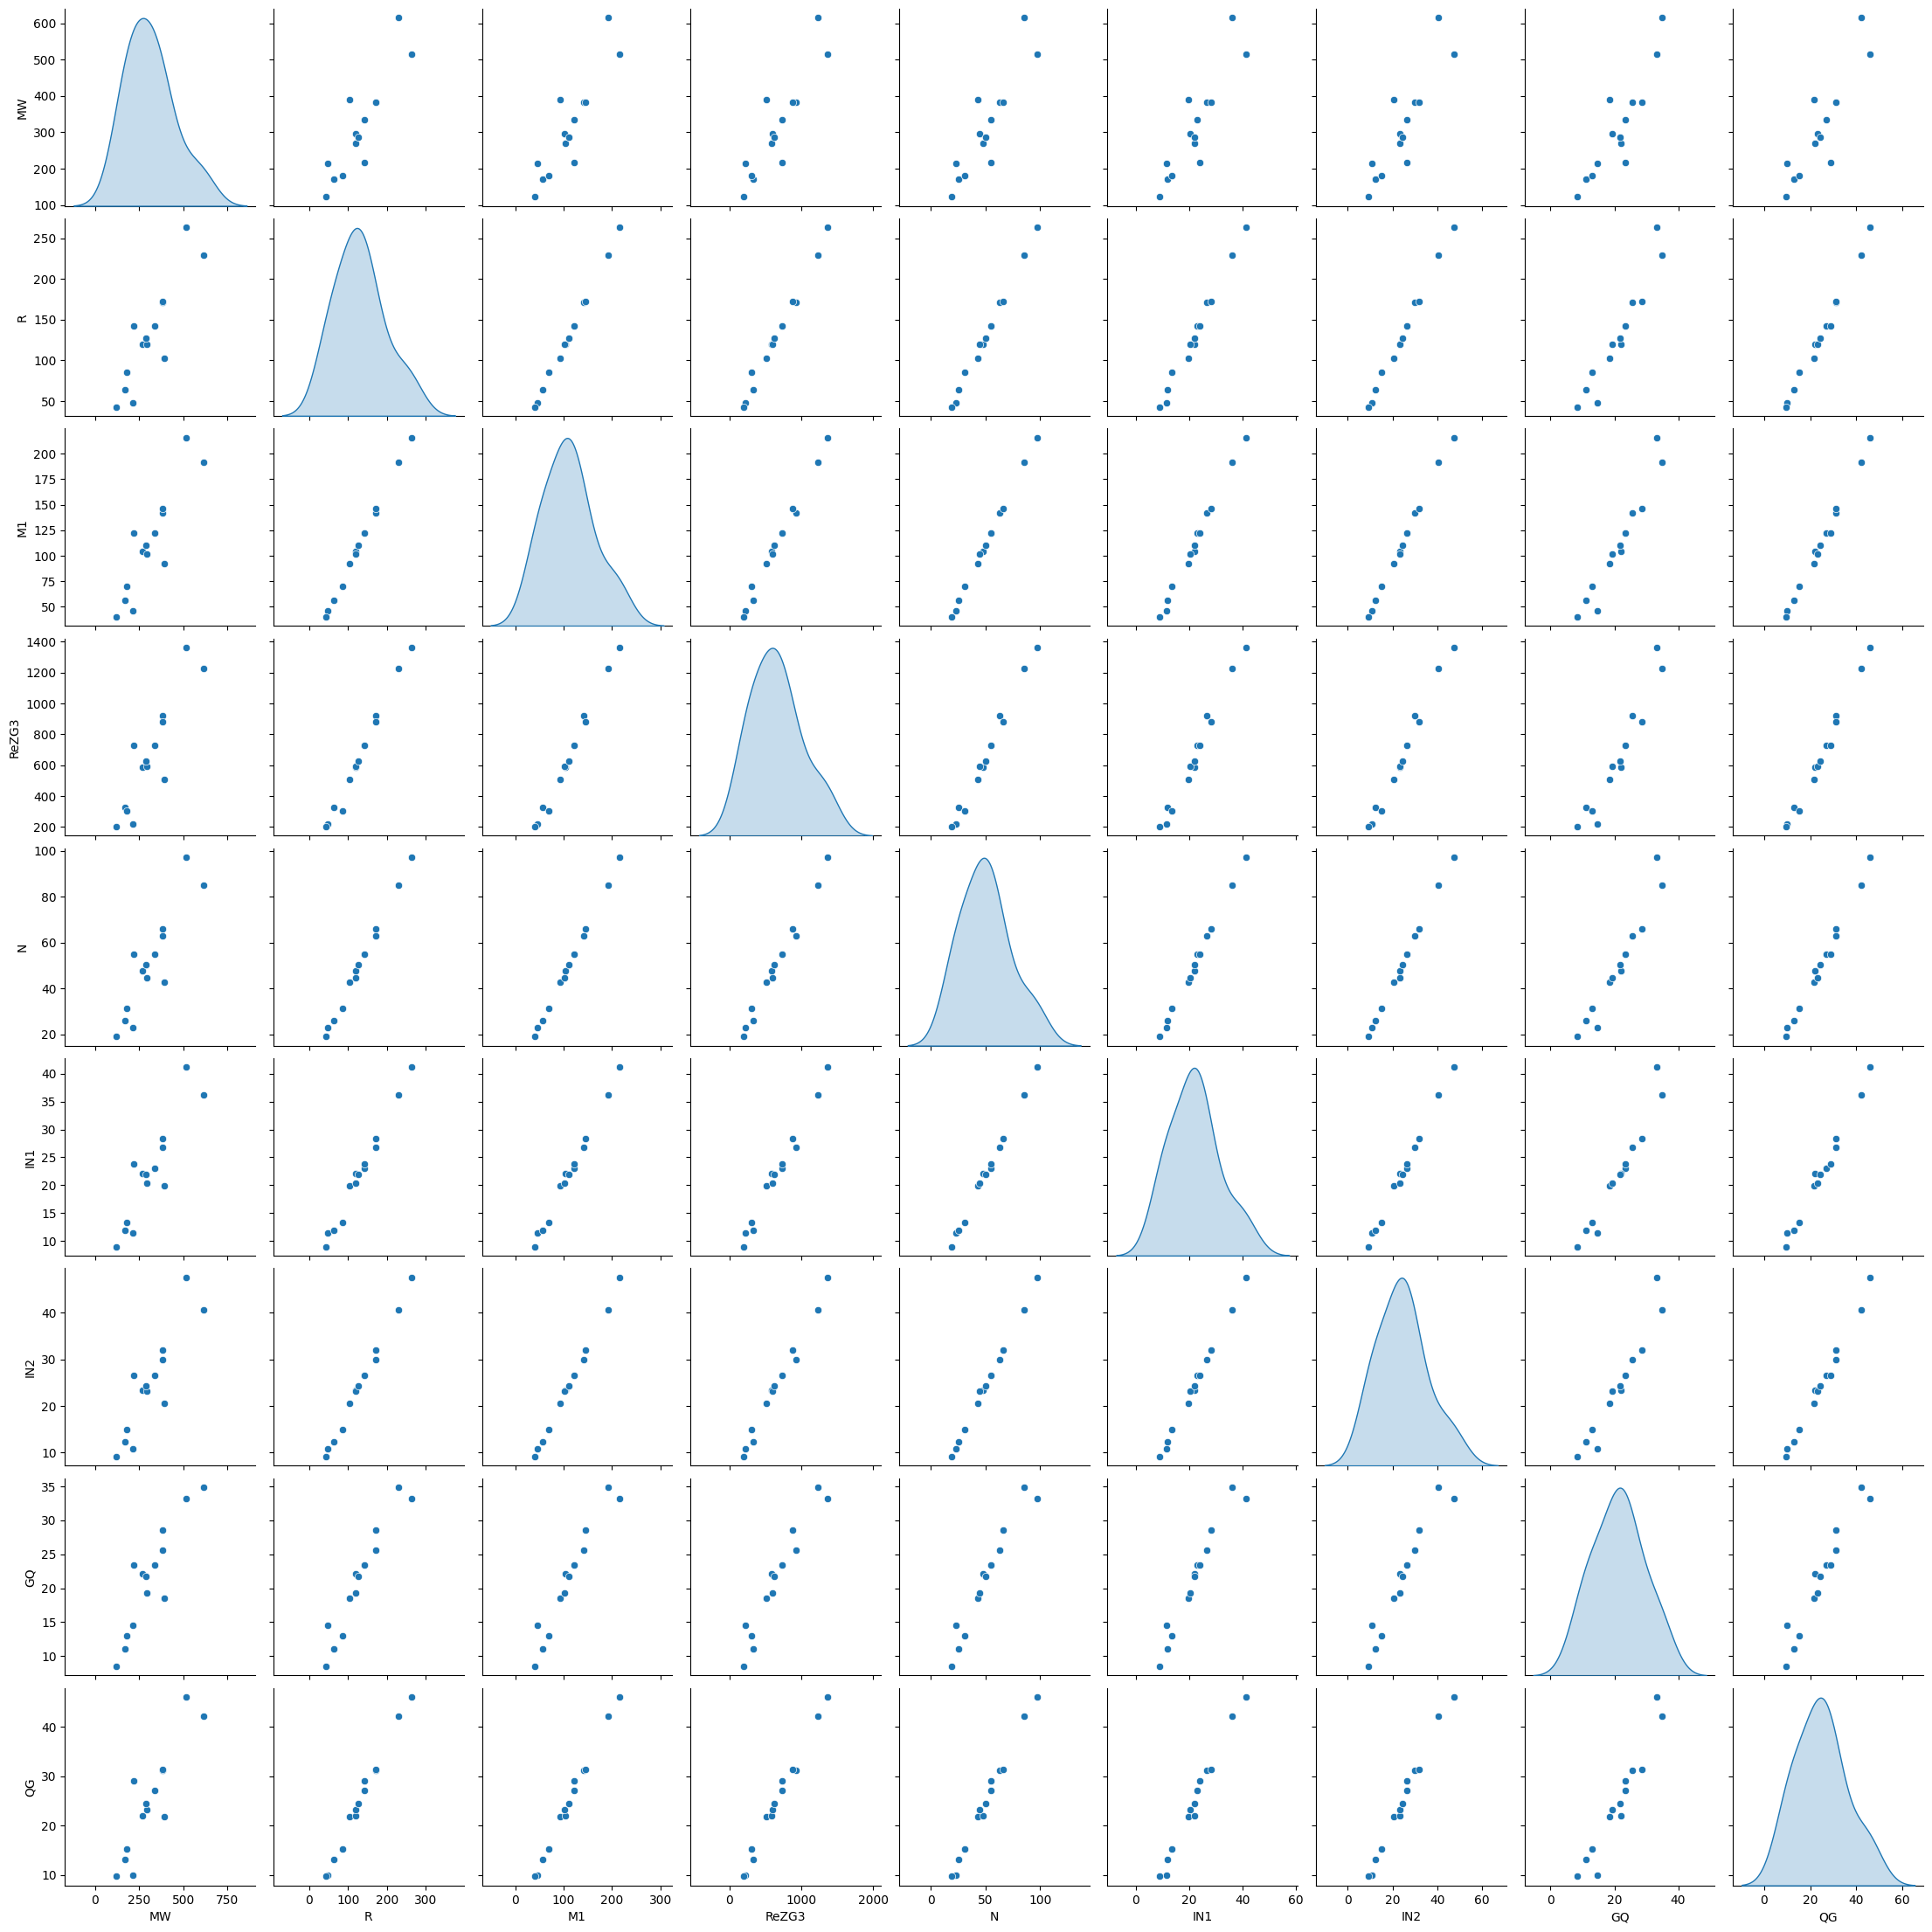

In [ ]:
# Generate pairplots
sns.pairplot(df, diag_kind='kde')
plt.show()

In [ ]:
# Define target and features
y = df['MW']
X = df.drop(columns=['MW'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'LASSO': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=0.1),
    'LASSO-CV': LassoCV(cv=5)
}


In [ ]:
# Perform exhaustive feature selection
results = {}
selected_features = {}
model_predictions = {}
for name, model in models.items():
    efs = EFS(model, min_features=1, max_features=len(X.columns), scoring='r2', cv=5)
    efs = efs.fit(X_train, y_train)
    best_features = list(efs.best_idx_)
    selected_features[name] = set(best_features)

    # Train model with selected features
    model.fit(X_train.iloc[:, best_features], y_train)
    y_pred = model.predict(X_test.iloc[:, best_features])
    model_predictions[name] = y_pred

    # Store results
    results[name] = {
        'Best Features': best_features,
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2 Score': r2_score(y_test, y_pred)
    }

Streaming output truncated to the last 5000 lines.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292.04837362398393, tolerance: 17.17839313428572
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.51332944553724, tolerance: 17.17839313428572
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325.7078780447482, tolerance: 17.17839313428572
  model = cd_fast.enet_coordinate_descent_gram(
/u